<a href="https://colab.research.google.com/github/Hamid-Mofidi/Diffusion-Models/blob/main/GMM_noising/synthetic_dateset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib

**GaussianMixture:** It's a class in scikit-learn representing a Gaussian Mixture Model, commonly used for clustering. You can fit this model to data using the Expectation-Maximization algorithm.

**make_blobs:** It's a function that generates isotropic Gaussian blobs for clustering and classification tasks. It's often used for creating synthetic datasets for testing machine learning algorithms.

In [12]:
# Parameters for generating Gaussian distributions
n_clusters = 4
n_samples_per_cluster = int(10000 / n_clusters)
n_features = 1
cluster_std_range = [0.5, 1]
#print(len(cluster_std_range))

In [13]:
def generate_gaussian_distributions(n_clusters, n_samples_per_cluster, n_features, cluster_std_range, random_seed=42):
    # Set NumPy random seed
    np.random.seed(random_seed)
    # Generate centers and cluster standard deviations
    centers = np.random.uniform(low=0, high=10, size=(n_features, n_clusters))
    cluster_std = np.random.uniform(low=cluster_std_range[0], high=cluster_std_range[1], size=n_clusters)

    # Generate synthetic dataset
    X, y = make_blobs(n_samples=n_samples_per_cluster * n_clusters,
                      n_features=n_features,
                      centers=centers.T,
                      cluster_std=cluster_std,
                      random_state=random_seed)

    return X, y

In [14]:
def plot_gaussian_distributions(X, y, n_clusters):
    # Plot histograms with different colors for each cluster
    colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
    for label, color in zip(np.unique(y), colors):
        idx = np.where(y == label)
        x_idx = X[idx]
        plt.hist(x_idx, alpha=0.5, color=color, label=f'Cluster {label}')

    plt.grid('both')
    plt.legend()
    plt.title(f'Histograms of {n_clusters} Gaussian Distributions')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.show()

    return colors

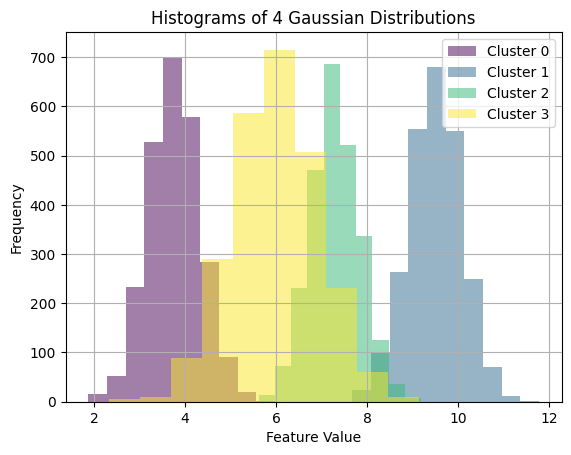

In [15]:
# Generate and plot Gaussian distributions
X, y = generate_gaussian_distributions(n_clusters, n_samples_per_cluster, n_features, cluster_std_range)
colors = plot_gaussian_distributions(X, y, n_clusters)

In [16]:
def add_noise(X, diffusion_steps, eps):
    X_noised = X.copy()
    for _ in range(diffusion_steps):
        noise = np.random.normal(size=X.shape)
        X_noised = X_noised + eps * noise
    return X_noised

In [17]:
def plot_noised_histograms(X_noised, y, colors):
    for label, color in zip(np.unique(y), colors):
        idx = np.where(y == label)
        x_idx = X_noised[idx]
        plt.hist(x_idx, alpha=0.2, color=color)

    plt.grid('both')
    plt.show()

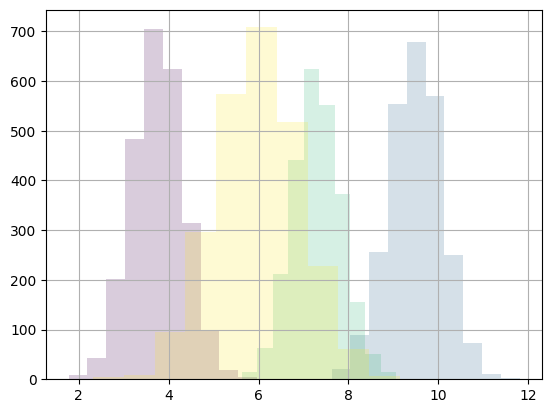

In [18]:
# Add noise to the data
diffusion_steps = 20
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms with noise
plot_noised_histograms(X_noised, y, colors)


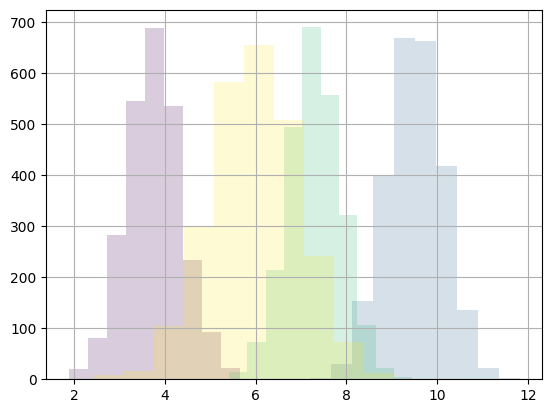

In [20]:
# Add noise to the data
diffusion_steps = 500
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms with noise
plot_noised_histograms(X_noised, y, colors)

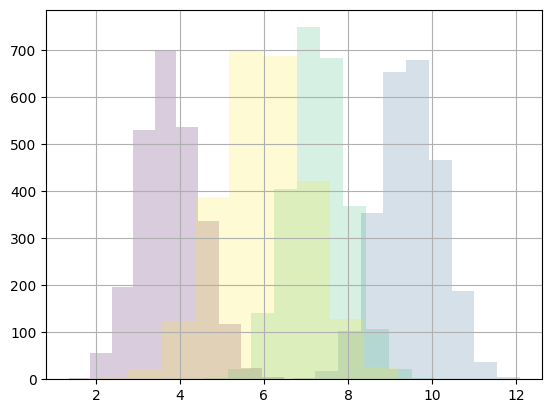

In [21]:
# Add noise to the data
diffusion_steps = 2000
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms with noise
plot_noised_histograms(X_noised, y, colors)

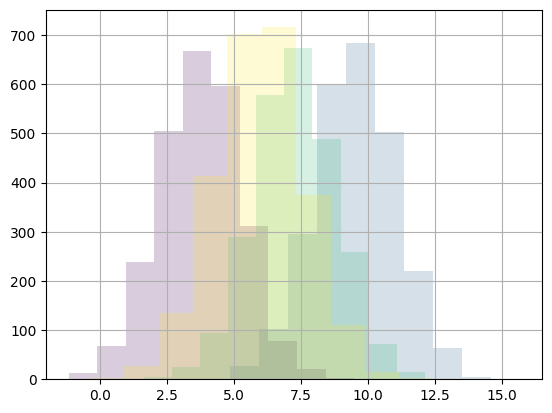

In [22]:
# Add noise to the data
diffusion_steps = 20000
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms with noise
plot_noised_histograms(X_noised, y, colors)

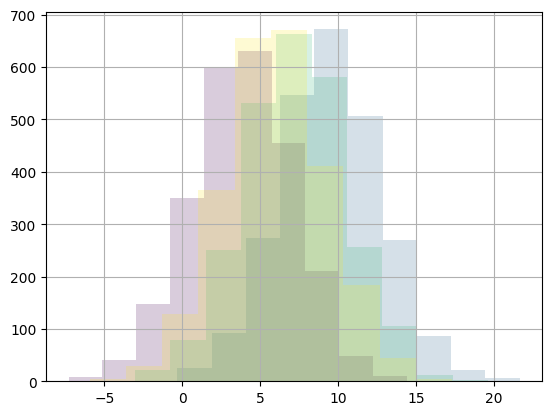

In [23]:
# Add noise to the data
diffusion_steps = 100000
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms with noise
plot_noised_histograms(X_noised, y, colors)